# Generic Command-Control Sweeps

In [1]:
import numpy as np
import lightlab.util.sweep as sUtil

In [2]:
# Turn this on when executing interactively
livePlots = False

In [3]:
class Plant():
    ''' Has an evaluate function that takes a command array and returns a measured array
        This just adds noise on top of the command
    '''
    def __init__(self, noiAmp=0.1):
        self.noiAmp = noiAmp

    def evaluate(self, cmdArr):
        noise = np.random.randn(len(cmdArr)) * self.noiAmp
        measArr = cmdArr + noise
        return measArr

## One dimensional

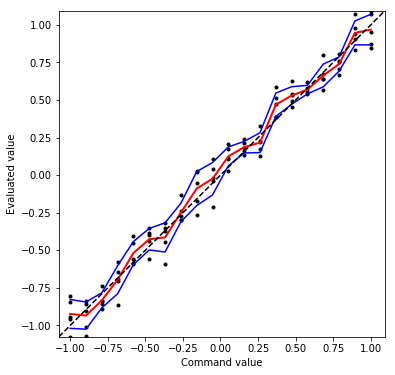

In [4]:
p = Plant(1e-1)
dom1 = np.linspace(-1,1,20)
ccSwp = sUtil.CommandControlSweeper(p.evaluate, [1, 1], 1, dom1, nTrials=5)
ccSwp.setMonitorOptions(livePlot=livePlots, plotEvery=5, cmdCtrlPrint=False, stdoutPrint=False)
ccSwp.setPlotOptions(plType='curves')
ccSwp.gather()

if not livePlots:
    ccSwp.plot()

## Two dimensional

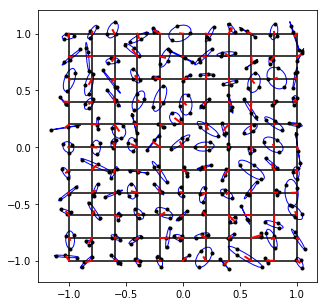

In [5]:
p = Plant(noiAmp=5e-2)
dom1 = np.linspace(-1,1,11)
dom2 = (dom1, dom1)
ccSwp = sUtil.CommandControlSweeper(p.evaluate, [1, 1], (0,1), dom2, nTrials=3)
ccSwp.setMonitorOptions(livePlot=livePlots, plotEvery=10, cmdCtrlPrint=False, stdoutPrint=False)
ccSwp.setPlotOptions(plType='cmdErr')
ccSwp.gather()
if not livePlots:
    ccSwp.plot()

## Save/load and scoring

In [6]:
fname = 'tempFile'

p = Plant(noiAmp=5e-2)
dom1 = np.linspace(-1,1,20)
ccSwp = sUtil.CommandControlSweeper(p.evaluate, [1, 1], 1, dom1, nTrials=5)
ccSwp.setMonitorOptions(livePlot=False, cmdCtrlPrint=False, stdoutPrint=False)
ccSwp.setPlotOptions(plType='curves')
print('Gathering')
ccSwp.gather()
ccSwp.saveObj(fname)

Gathering


Loading
/Users/atait/Dropbox/Documents/gitProjects/experiment-code/calibration-instrumentation/data/tempFile
accuracy (bits) = 6.787238 ;  precision (bits) = 5.288937


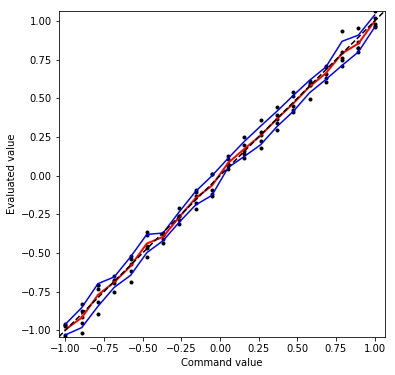

In [7]:
print('Loading')
ccSwp = sUtil.CommandControlSweeper.loadObj(fname)
ccSwp.plot()
    
accuracy, precision = ccSwp.score(bits=True)
print('accuracy (bits) = {:.6f}'.format(accuracy), ';  precision (bits) = {:.6f}'.format(precision))
assert accuracy > 4 and precision > 4

## Combining sweeps with weight measurement
This is done through the WeightTuningManager.evaluateSweep

It will be documented here once a virtual lab is running